In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import scipy
import seaborn as sns
sns.set( style="ticks" )

In [19]:
import numpy as np
import pandas as pd
from tabulate import tabulate
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv("1_dataset_elec.csv", index_col = 0)
data.tail()

,date,supply,demand,industry,civil,OR
390,20220126,32599,30050,383.226,247.539,3464
391,20220127,32870,29406,378.400,244.422,4700
392,20220128,32353,27653,358.867,231.804,3346
393,20220129,29565,26219,334.252,215.905,3087
394,20220130,28194,25107,318.076,205.457,3111


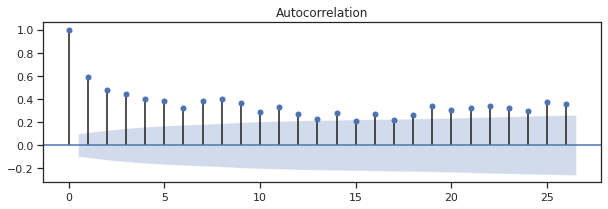

In [5]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(311)
fig = plot_acf(data['OR'], ax=ax1, title="Autocorrelation")

In [6]:
result = adfuller(data['OR'])
print('p-value: {}'.format(round(result[1],4)))

p-value: 0.1488


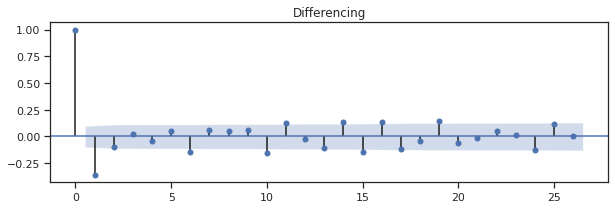

In [7]:
fig = plt.figure(figsize=(10,10))
ax2 = fig.add_subplot(312)
fig = plot_acf(data['OR'].diff().dropna(), ax=ax2, title="Differencing")

In [8]:
result = adfuller(data['OR'].diff().dropna())
print('p-value: %f' % result[1])

p-value: 0.000000


In [9]:
Order = []
for p in range(1,6):
    for q in range(1,3):
        try:
            model = ARIMA(data['OR'], order=(p, 1, q))
            results = model.fit(disp=0)
            Order.append(round(pd.read_html(results.summary().as_html(), header=0, index_col=0)[0].iloc[2,2],2))
        except:
            Order.append('NA')
            print('No Result')
 
b = [Order[i:i+2] for i in range(0,len(Order),2)]
Order_df = pd.DataFrame(b,index=range(1,6),columns=range(1,3))
Order_df.index.name = "p \\ q "
print(tabulate(Order_df, headers='keys', tablefmt='fancy_grid',numalign="center"))

╒══════════╤═════════╤═════════╕
│  p \ q   │    1    │    2    │
╞══════════╪═════════╪═════════╡
│    1     │ 6295.72 │ 6296.06 │
├──────────┼─────────┼─────────┤
│    2     │ 6296.58 │ 6297.72 │
├──────────┼─────────┼─────────┤
│    3     │ 6297.09 │ 6296.22 │
├──────────┼─────────┼─────────┤
│    4     │ 6299.05 │ 6298.22 │
├──────────┼─────────┼─────────┤
│    5     │ 6300.98 │ 6299.28 │
╘══════════╧═════════╧═════════╛


In [10]:
#model = ARIMA(data, order=(5, 1, 2))
model = ARIMA(data['OR'], order=(1, 1, 1))
results = model.fit()
print(results.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D.OR   No. Observations:                  394
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3143.859
Method:                       css-mle   S.D. of innovations            705.377
Date:                Tue, 15 Mar 2022   AIC                           6295.718
Time:                        03:37:49   BIC                           6311.623
Sample:                             1   HQIC                          6302.021
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0186      4.122     -0.005      0.996      -8.098       8.061
ar.L1.D.OR     0.3385      0.056      6.066      0.000       0.229       0.448
ma.L1.D.OR    -0.9256      0.023    -39.743      0.0

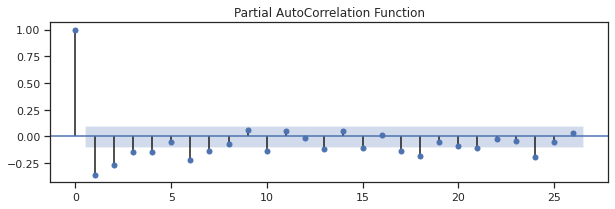

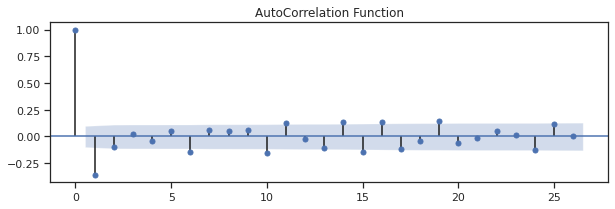

In [11]:
fig = plt.figure(figsize=(10,10))
ax3 = fig.add_subplot(312)
fig = plot_pacf(data['OR'].diff().dropna(), ax=ax3, title="Partial AutoCorrelation Function")
fig = plt.figure(figsize=(10,10))
ax4 = fig.add_subplot(312)
fig = plot_acf(data['OR'].diff().dropna(), ax=ax4, title="AutoCorrelation Function")

In [12]:
data.head()

,date,supply,demand,industry,civil,OR
0,20210101,28487,25720,311.468,212.061,2936
1,20210102,28421,25485,304.952,207.625,3037
2,20210103,28513,25476,299.771,204.098,3032
3,20210104,32766,29734,342.273,233.036,3067
4,20210105,33117,30050,353.795,240.880,3102


### 385, 395 version

In [22]:
price = data['OR'].values
#length = int(len(price) * 0.8)
#train = list(price[0:length])
#test =  price[length:len(price)]
length = 385
train = list(price[0:385])
test =  price[385:len(price)]
date = data.index[length:len(price)]
#date = data['date']
predictions = []
low_bound = []
up_bound = []

print(len(price), len(train), len(test))
 
for i in range(len(test)):
    #model = ARIMA(train, order=(5, 1, 2))
    model = ARIMA(train, order=(1, 1, 1))
    model_fit = model.fit(disp=0)
    pred = model_fit.forecast()[0]
    predictions.append(pred)
    real = test[i]
    #train.append(real[0])   
    train.append(real)   
    low_bound.append(model_fit.forecast()[2][0][0])
    up_bound.append(model_fit.forecast()[2][0][1])
 
    #print(date[i] ,"|", 'Pred - '+str(round(pred[0],2)) ,"|", 'Real - '+str(real[0]))
    print(date[i] ,"|", 'Pred - '+str(round(pred[0],2)) ,"|", 'Real - '+str(real))

MSE = mean_squared_error(test, predictions)
MAE = mean_absolute_error(test, predictions)
print('Mean Squared Error : '+str(round(MSE,4)/10))
print('Mean Absolute Error : '+str(round(MAE,4)/10))

395 385 10
385 | Pred - 2605.93 | Real - 3032
386 | Pred - 2929.39 | Real - 2301
387 | Pred - 2628.74 | Real - 3167
388 | Pred - 2963.73 | Real - 2963
389 | Pred - 2895.51 | Real - 2549
390 | Pred - 2727.74 | Real - 3464
391 | Pred - 3093.57 | Real - 4700
392 | Pred - 3650.46 | Real - 3346
393 | Pred - 3162.91 | Real - 3087
394 | Pred - 3069.34 | Real - 3111
Mean Squared Error : 42091.13684
Mean Absolute Error : 47.046929999999996


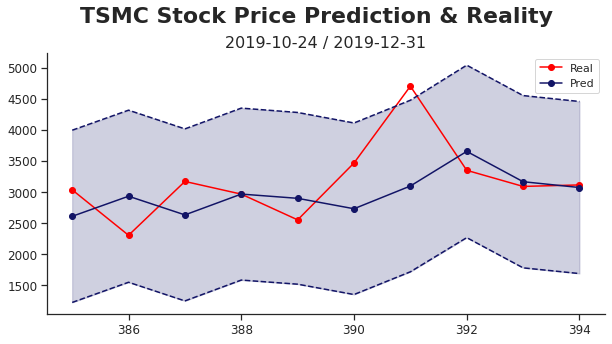

In [23]:
df = pd.DataFrame(index=date)
#df.index = pd.to_datetime(df.index)
df['real'] = test
df['pred'] = predictions
df['lb'] = low_bound
df['ub'] = up_bound
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot()
 
fig.suptitle('TSMC Stock Price Prediction & Reality', fontsize=22, fontweight='bold')
ax.set_title('2019-10-24 / 2019-12-31', fontsize=16,)
fig.subplots_adjust(top=0.85)
 
ax.tick_params(labelsize=12)
ax.plot(df.real, color='red', label='Real', marker='o',
         markerfacecolor='red',markersize=6)
ax.plot(df.pred, color='#121466', label='Pred', marker='o',
         markerfacecolor='#121466',markersize=6)
ax.legend()
ax.plot(df.lb, color='#121466', ls="--", alpha = 1)
ax.plot(df.ub, color='#121466', ls="--", alpha = 1)
ax.fill_between(df.index, 
                df.lb,
                df.ub,
                color = '#121466',
                alpha=.2,)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('TSMC_prediction.png',dpi=300)

### 80% 20% version

In [24]:
price = data['OR'].values
length = int(len(price) * 0.8)
train = list(price[0:length])
test =  price[length:len(price)]
date = data.index[length:len(price)]
#date = data['date']
predictions = []
low_bound = []
up_bound = []

print(len(price), len(train), len(test))
 
for i in range(len(test)):
    #model = ARIMA(train, order=(5, 1, 2))
    model = ARIMA(train, order=(1, 1, 1))
    model_fit = model.fit(disp=0)
    pred = model_fit.forecast()[0]
    predictions.append(pred)
    real = test[i]
    #train.append(real[0])   
    train.append(real)   
    low_bound.append(model_fit.forecast()[2][0][0])
    up_bound.append(model_fit.forecast()[2][0][1])
 
    #print(date[i] ,"|", 'Pred - '+str(round(pred[0],2)) ,"|", 'Real - '+str(real[0]))
    print(date[i] ,"|", 'Pred - '+str(round(pred[0],2)) ,"|", 'Real - '+str(real))

MSE = mean_squared_error(test, predictions)
MAE = mean_absolute_error(test, predictions)
print('Mean Squared Error : '+str(round(MSE,4)/79))
print('Mean Absolute Error : '+str(round(MAE,4)/79))

395 316 79
316 | Pred - 4651.82 | Real - 4827
317 | Pred - 4545.71 | Real - 3571
318 | Pred - 3990.55 | Real - 3899
319 | Pred - 4120.67 | Real - 3859
320 | Pred - 4093.55 | Real - 3466
321 | Pred - 3904.19 | Real - 5704
322 | Pred - 4895.18 | Real - 4094
323 | Pred - 4215.77 | Real - 4098
324 | Pred - 4213.87 | Real - 6608
325 | Pred - 5314.12 | Real - 4036
326 | Pred - 4256.57 | Real - 3858
327 | Pred - 4173.03 | Real - 3937
328 | Pred - 4193.34 | Real - 4089
329 | Pred - 4247.62 | Real - 3727
330 | Pred - 4088.64 | Real - 3435
331 | Pred - 3947.41 | Real - 2773
332 | Pred - 3633.24 | Real - 4007
333 | Pred - 4125.63 | Real - 4556
334 | Pred - 4358.94 | Real - 3821
335 | Pred - 4054.6 | Real - 4966
336 | Pred - 4535.76 | Real - 4418
337 | Pred - 4325.58 | Real - 3620
338 | Pred - 3992.68 | Real - 3792
339 | Pred - 4048.62 | Real - 2841
340 | Pred - 3628.23 | Real - 4244
341 | Pred - 4189.74 | Real - 3256
342 | Pred - 3773.35 | Real - 3531
343 | Pred - 3862.15 | Real - 3273
344 | Pred

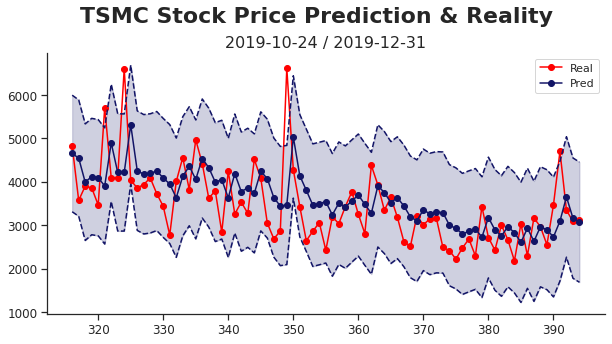

In [25]:
df = pd.DataFrame(index=date)
#df.index = pd.to_datetime(df.index)
df['real'] = test
df['pred'] = predictions
df['lb'] = low_bound
df['ub'] = up_bound
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot()
 
fig.suptitle('TSMC Stock Price Prediction & Reality', fontsize=22, fontweight='bold')
ax.set_title('2019-10-24 / 2019-12-31', fontsize=16,)
fig.subplots_adjust(top=0.85)
 
ax.tick_params(labelsize=12)
ax.plot(df.real, color='red', label='Real', marker='o',
         markerfacecolor='red',markersize=6)
ax.plot(df.pred, color='#121466', label='Pred', marker='o',
         markerfacecolor='#121466',markersize=6)
ax.legend()
ax.plot(df.lb, color='#121466', ls="--", alpha = 1)
ax.plot(df.ub, color='#121466', ls="--", alpha = 1)
ax.fill_between(df.index, 
                df.lb,
                df.ub,
                color = '#121466',
                alpha=.2,)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('TSMC_prediction.png',dpi=300)

In [ ]:
# 用此種方法 畫出所有 feature 和 survival 之間的關係。僅列出一張圖做為代表
# ['Sex'] and ['Survived']
sns.catplot( x="Sex", y="Survived", data=train_set, kind = "bar" )

# Here we can found female has higher probability to survive
# Survive rate of male:   about 20% 
# Survive rate of female: about 75%

In [ ]:
# 用此種方法去繪出 連續性質 的數據
# ['Age'] and ['Survived']
sns.kdeplot( x="Age", hue="Survived", multiple="stack", data=train_set)

# It shows that 
"""
1. Age under 15 have higher Survive rate
2. Age over about 70 have 0% Survive rate
3. Age between 15 and 50 have lower Survive rate
"""

Conclusion:

For the Survived Rate:
- ['Sex'] plays an important role 
- ['PClass'] also plays an important role
- ['Embarked'], ['Age'], ['Fare'] might be important
- ['Parch'], ['SibSp'] might be less important
- ['Name'], ['Ticket'], ['Cabin'] ignore. 
  - Name: might affect due to ['Pclass'], but need deal with String.
  - Ticket: Not sure. String.
  - Cabin: might affect, but too many NULL data.

In [ ]:
# 資料分析與前處理

# Fill or Drop Null NA
## Using Pandas to Preprocessing
## 'inplace = True' means the change will overwrite the origin data

train_set.drop(['PassengerId','Name','Ticket'], 1, inplace=True) # Drop Unused Columns
train_set.drop(['Cabin'], 1, inplace=True)  # Drop 'Cabin'
train_set['Age'].fillna( train_set['Age'].median(), inplace=True )  # Fill 'Age' NA with Age's median.
train_set.dropna(inplace=True)  # Drop NA of rows having NA (remove Null Embarked)
train_set.info()

# Use get_dummies to transform string into numeric data

categorical_vars = train_set[['Sex','Embarked']]                  # set of 'to be dummied'
dummies = pd.get_dummies(categorical_vars,drop_first=True)    # set of 'after get_dummies'
train_set.drop(['Sex','Embarked'],axis=1, inplace=True)           # drop original data of those columns
train_set = pd.concat([train_set,dummies],axis=1)                     # concat the dummies data and the original data
train_set.head()

# 最後的 訓練集
train_x = train_set.drop(['Survived'],1)
train_y = train_set['Survived']

## 模型訓練

請在此區塊後使用**一個或多個區塊**進行模型訓練，**需要**包含以下內容：

- **選擇模型**
    - 設定模型**超參數**
    - **控制隨機亂數**
- 計算**準確度（Accuracy）**
    - 使用 **5-fold cross validation**，輸出**平均準確度**
    - 最後再使用**所有**資料進行訓練並輸出**準確度**
    - 準確度必須**超越**課堂使用的範例
    
如果有進行多於一個以上的實驗，**可以保留所有**的實驗結果，但是執行時間將會納入**全部**實驗。

Select Algorighm from 10 Different Algorithms

Here we try 10 different algorithms to decide which one we're going to use later.
1. KNC
2. SVC
3. NuSVC
4. DecisionTreeC
5. RandomForestC
6. AdaBoostC
7. GradientBoostingC
8. GaussianNB
9. LinearDiscriminantAnalysis
10. QuadraticDiscriminantAnalysis()

In [ ]:
# We will try a lot of models later
from sklearn.model_selection import GridSearchCV                     
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# modified from TA's code
# requirement: `random_state=1012`
# 模型訓練

from sklearn.model_selection import KFold             # 匯入 K 次交叉驗證工具
from sklearn.tree import DecisionTreeClassifier       # 匯入決策樹模型
from sklearn.metrics import accuracy_score            # 匯入準確度計算工具

kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)                              # 給予資料範圍


# Here we use different classifier
for clf in classifiers:

  train_acc_list = []                                   # 儲存每次訓練模型的準確度
  valid_acc_list = []                                   # 儲存每次驗證模型的準確度

  for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
      train_x_split = train_x.iloc[train_index]         # 產生訓練資料
      train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
      valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
      valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤
    
      # Here we use different classifier to fit trainning data
      clf.fit(train_x_split, train_y_split)             # 訓練決策樹模型
      

      train_pred_y = clf.predict(train_x_split)         # 確認模型是否訓練成功
      train_acc = accuracy_score(train_y_split,         # 計算訓練資料準確度
                                train_pred_y)
      valid_pred_y = clf.predict(valid_x_split)         # 驗證模型是否訓練成功
      valid_acc = accuracy_score(valid_y_split,         # 計算驗證資料準確度
                                valid_pred_y)
      
      train_acc_list.append(train_acc)
      valid_acc_list.append(valid_acc)

  print( clf.__class__.__name__ )        # print classifier's name
  print((
      'average train accuracy: {}\n' +
      '    min train accuracy: {}\n' +
      '    max train accuracy: {}\n' +
      'average valid accuracy: {}\n' +
      '    min valid accuracy: {}\n' +
      '    max valid accuracy: {}').format(
      np.mean(train_acc_list),                          # 輸出平均訓練準確度
      np.min(train_acc_list),                           # 輸出最低訓練準確度
      np.max(train_acc_list),                           # 輸出最高訓練準確度
      np.mean(valid_acc_list),                          # 輸出平均驗證準確度
      np.min(valid_acc_list),                           # 輸出最低驗證準確度
      np.max(valid_acc_list)                            # 輸出最高驗證準確度
  ))
  print("="*30)

我選擇以 Gradient Boosting Classifer 作為要使用的演算法

選參數：

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
param_grid = {'loss':['deviance', 'exponential'], 'n_estimators':[100], 'subsample':[0.8, 1], 'max_depth':[3, 4, 5]}

# Split data into "trainning data", "testing data", and "validation data"
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.4, random_state=12)
# Try different model parameters
grid = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=cv, verbose=5, n_jobs=-1)
# Train model
grid.fit(train_x, train_y)

grid.best_params_

最後 5-Fold 測驗

In [ ]:
# 模型訓練

from sklearn.model_selection import KFold             # 匯入 K 次交叉驗證工具
from sklearn.tree import DecisionTreeClassifier       # 匯入決策樹模型
from sklearn.metrics import accuracy_score            # 匯入準確度計算工具

kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)                              # 給予資料範圍


train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度

for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤
  
    clf = GradientBoostingClassifier(random_state=1012, loss='exponential', max_depth=4, n_estimators=100, subsample=1) # 創造決策樹模型
    clf.fit(train_x_split, train_y_split)             # 訓練決策樹模型
    
    train_pred_y = clf.predict(train_x_split)         # 確認模型是否訓練成功
    train_acc = accuracy_score(train_y_split,         # 計算訓練資料準確度
                              train_pred_y)
    valid_pred_y = clf.predict(valid_x_split)         # 驗證模型是否訓練成功
    valid_acc = accuracy_score(valid_y_split,         # 計算驗證資料準確度
                              valid_pred_y)
    
    train_acc_list.append(train_acc)
    valid_acc_list.append(valid_acc)


print((
    'average train accuracy: {}\n' +
    '    min train accuracy: {}\n' +
    '    max train accuracy: {}\n' +
    'average valid accuracy: {}\n' +
    '    min valid accuracy: {}\n' +
    '    max valid accuracy: {}').format(
    np.mean(train_acc_list),                          # 輸出平均訓練準確度
    np.min(train_acc_list),                           # 輸出最低訓練準確度
    np.max(train_acc_list),                           # 輸出最高訓練準確度
    np.mean(valid_acc_list),                          # 輸出平均驗證準確度
    np.min(valid_acc_list),                           # 輸出最低驗證準確度
    np.max(valid_acc_list)                            # 輸出最高驗證準確度
))

## 加分題

請將訓練後的模型套用至 [Kaggle Titanic](https://www.kaggle.com/c/titanic/overview) `test.csv` 上，並上傳至 Kaggle 進行評分，**截圖**後**嵌入**至 `markdown` 區塊中。

In [ ]:
# test data 前處理（同train data）
test = pd.read_csv("test.csv") 
test['Age'].fillna(test['Age'].median(),inplace=True) # Age
test['Fare'].fillna(test['Fare'].median(),inplace=True) # Fare
test['Embarked'].fillna(test['Embarked'].value_counts().index[0], inplace=True) # Embarked
ids = test[['PassengerId']]# Passenger Ids
test.drop(['PassengerId','Name','Ticket','Cabin'],1,inplace=True)# Drop Unnecessary Columns
categorical_vars = test[['Sex','Embarked']]# Get Dummies of Categorical Variables
dummies = pd.get_dummies(categorical_vars,drop_first=True)
test = test.drop(['Sex','Embarked'],axis=1)#Drop the Original Categorical Variables
test = pd.concat([test,dummies],axis=1)#Instead, concat the new dummy variables
test.head()

# 開始訓練
clf = GradientBoostingClassifier(loss='exponential', max_depth=4, n_estimators=100, subsample=1)
clf.fit(train_x, train_y)

# 開始預測
preds = clf.predict(test)
results = ids.assign(Survived=preds)
# 儲存結果
results.to_csv('titanic_submission.csv',index=False)

- ![](https://i.imgur.com/HYRSKWq.png)

In [ ]:
# 因為看不出來明顯相關性，試著把 SibSp 和 Parch 直接丟掉:
train_x_3 = train_set.drop(['Survived','SibSp','Parch'],1)
train_y_3 = train_set['Survived']
test_3 = test.drop(['SibSp','Parch'],1)

# 開始訓練
clf = GradientBoostingClassifier(loss='exponential', max_depth=4, n_estimators=100, subsample=1)
clf.fit(train_x_3, train_y_3)

# 開始預測
preds = clf.predict(test_3)
results = ids.assign(Survived=preds)
# 儲存結果
results.to_csv('titanic_submission.csv',index=False)

Result : 
![](https://i.imgur.com/6DSGrPn.png)

In [ ]:
"""
train_set_2 = train_set.copy()
test_2 = test.copy()

y = train_set_2['Survived']
X = train_set_2.drop(['Survived'],1)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
test = sc.fit_transform(test)


from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units=10,kernel_initializer='uniform',activation='relu',input_dim=8))
    classifier.add(Dropout(rate = 0.2))
    classifier.add(Dense(units=128,kernel_initializer='uniform',activation='relu'))
    classifier.add(Dropout(rate = 0.2))
    classifier.add(Dense(units=512,kernel_initializer='uniform',activation='relu'))
    classifier.add(Dropout(rate = 0.2))
    classifier.add(Dense(units=128,kernel_initializer='uniform',activation='relu'))
    classifier.add(Dropout(rate = 0.2))
    classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
    classifier.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return classifier


from sklearn.model_selection import GridSearchCV
classifier = KerasClassifier(build_fn = build_classifier)
param_grid = dict(optimizer = ['Adam'],
                  epochs=[10, 20, 50, 100],
                  batch_size=[16, 25, 32, 256, 512])
grid = GridSearchCV(estimator=classifier, param_grid=param_grid, scoring='accuracy')
grid_result = grid.fit(X, y)
best_parameters = grid.best_params_
best_accuracy = grid.best_score_

print(  grid_result, "\n",
        best_parameters , "\n",
        best_accuracy )

classifier = KerasClassifier(build_fn = build_classifier,
                             optimizer=best_parameters['optimizer'],
                             batch_size=best_parameters['batch_size'],
                             epochs=best_parameters['epochs'])

classifier.fit(X,y)
preds = classifier.predict(test)

results = ids.assign(Survived=preds)
results['Survived'] = results['Survived'].apply(lambda row: 1 if row > 0.5 else 0)
results.to_csv('titanic_submission.csv',index=False)
results.head(20)
"""

result:
- ![](https://i.imgur.com/l4l3ben.png)

In [ ]:
# 執行時間較長，直接顯示結果
"""
y = train_set_2['Survived']
X = train_set_2.drop(['Survived'],1)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
test = sc.fit_transform(test)


from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units=10,kernel_initializer='uniform',activation='relu',input_dim=8))
    classifier.add(Dropout(rate = 0.2))
    classifier.add(Dense(units=128,kernel_initializer='uniform',activation='relu'))
    classifier.add(Dropout(rate = 0.2))
    classifier.add(Dense(units=128,kernel_initializer='uniform',activation='relu'))
    classifier.add(Dropout(rate = 0.2))
    classifier.add(Dense(units=128,kernel_initializer='uniform',activation='relu'))
    classifier.add(Dropout(rate = 0.2))
    classifier.add(Dense(units=128,kernel_initializer='uniform',activation='relu'))
    classifier.add(Dropout(rate = 0.2))
    classifier.add(Dense(units=128,kernel_initializer='uniform',activation='relu'))
    classifier.add(Dropout(rate = 0.2))
    classifier.add(Dense(units=128,kernel_initializer='uniform',activation='relu'))
    classifier.add(Dropout(rate = 0.2))
    
    classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
    classifier.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return classifier


from sklearn.model_selection import GridSearchCV
classifier = KerasClassifier(build_fn = build_classifier)
param_grid = dict(optimizer = ['Adam'],
                  epochs=[100, 200],
                  batch_size=[16, 25, 64])
grid = GridSearchCV(estimator=classifier, param_grid=param_grid, scoring='accuracy')
grid_result = grid.fit(X, y)
best_parameters = grid.best_params_
best_accuracy = grid.best_score_

print(  grid_result, "\n",
        best_parameters , "\n",
        best_accuracy )

classifier = KerasClassifier(build_fn = build_classifier,
                             optimizer=best_parameters['optimizer'],
                             batch_size=best_parameters['batch_size'],
                             epochs=best_parameters['epochs'])

classifier.fit(X,y)
preds = classifier.predict(test)

results = ids.assign(Survived=preds)
results['Survived'] = results['Survived'].apply(lambda row: 1 if row > 0.5 else 0)
results.to_csv('titanic_submission.csv',index=False)
results.head(20)
"""

- ![](https://i.imgur.com/px47a5L.png)

In [ ]:
# 請勿更動此區塊程式碼

EXECUTION_END_TIME = time.time() # 計算執行時間
print('total execution time: {}'.format(EXECUTION_END_TIME - EXECUTION_START_TIME))

# 完整實驗過程(Google Colab)： 
- 我發現我來不及把資料搬過來...
- https://colab.research.google.com/drive/1m81d34cSrC5KvTKF1Bn8QF9tF94X79-x?usp=sharing